In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = '_skimmed_SR'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/example_signal{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/example_bkg{suffix}.coffea')[0]

In [5]:
# sig_histo / bkg_histo is a dictionary of variables
print(sig_histo.keys())

dict_keys(['sel_e1_pt', 'sel_e1_eta', 'sel_e1_phi', 'sel_e1_dxy', 'sel_e1_dxySignif', 'sel_e1_miniRelIso', 'sel_e1_miniRelIsoCorr', 'sel_e1_mindRJets', 'sel_e1_isPF', 'sel_e1_passConvVeto', 'sel_e1_IDscore', 'sel_e2_pt', 'sel_e2_eta', 'sel_e2_phi', 'sel_e2_dxy', 'sel_e2_dxySignif', 'sel_e2_miniRelIso', 'sel_e2_miniRelIsoCorr', 'sel_e2_mindRJets', 'sel_e2_isPF', 'sel_e2_passConvVeto', 'sel_e2_IDscore', 'sel_e1e2_type', 'sel_vtx_dR', 'sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_leadpT', 'sel_vtx_METdPhi', 'sel_vtx_mindRj', 'sel_vtx_chi2', 'sel_vtx_mass', 'sel_vtx_mindPhiJ', 'sel_vtx_sign', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_type', 'sel_vtx_minEleDrJ', 'sel_vtx_minEleDPhiJ', 'sel_vtx_mass_low', 'sel_vtx_mindxy_low', 'sel_vtx_sign_etaProd', 'sel_vtx_CosThetaColl', 'sel_vtx_LxyCosThetaColl', 'sel_vtx_LxyCosThetaCollZoom', 'sel_vtx_LxyCosThetaCollZoomZoom', 'sel_vtx_eleDphi', 'sel_vtx_maxMiniRelIso', 'sel_vtx_maxMiniRelIsoCorr', 'sel_vtx_e1e

## Signal

### Access the cutflow information

See `analysisTools/utils.py` for more information

In [6]:
utils.get_signal_list_of_cuts(sig_histo)

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [7]:
utils.get_signal_list_of_cuts(sig_histo, get_cut_idx = True)

['all', 'hasVtx', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10']

**Based on the signal file name, i.e. sig_2018_Mchi-55p0_dMchi-10p0_ctau-100, extract the mass point, lifetime, etc and make it into a pandas dataframe**: use `signalPoint` defined in `/python_analysis/analysisTools/plotTools.py`

In [8]:
utils.get_signal_point_dict(sig_histo)

,mchi,dmchi,ctau,m1,m2,delta,name
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,99.0,18.0,100.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-100
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,94.5,9.0,100.0,90.0,99.0,0.1,sig_2018_Mchi-94p5_dMchi-9p0_ctau-100
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,99.0,18.0,10.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-10
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,99.0,18.0,1.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-1
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,88.0,16.0,100.0,80.0,96.0,0.2,sig_2018_Mchi-88p0_dMchi-16p0_ctau-100
...,...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,110.0,20.0,100.0,100.0,120.0,0.2,sig_2018_Mchi-110p0_dMchi-20p0_ctau-100
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.5,1.0,1.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,105.0,10.0,100.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-100
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,105.0,10.0,10.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-10


**There are four cutflow-related variables in the coffea output.**

- `cutDesc`: cut names
- `cutflow`: efficiency = selected events / total events `cutflow[cutName] += np.sum(events.genWgt)/sum_wgt`
- `cutflow_cts`: reweighted by xsec `cutflow_counts[cutName] = xsec*lumi*cutflow[cutName]`
- `cutflow_nevts`: raw counts `cutflow_nevts[cutName] += len(events)` -- will not be used.
- `cutflow_vtx_matched`: (for signal MC only) fraction that the selected vertex (lowest chi2) passes the truth-matching (gen-matching)

In [9]:
# cutDesc
print(sig_histo['cutDesc'])

print(f"\nex) cut8 corresponds to {sig_histo['cutDesc']['cut8']}")

defaultdict(<class 'str'>, {'all': 'No cuts', 'hasVtx': 'Baseline Selection', 'cut5': 'No b-tagged jets', 'cut6': 'Leading jet |eta| < 2.4', 'cut7': 'Leading jet pT > 80 GeV', 'cut8': 'dPhi(MET,leading jet) > 1.5', 'cut9': 'dPhi(MET,all jets) > 0.75', 'cut10': 'BDT'})

ex) cut8 corresponds to dPhi(MET,leading jet) > 1.5


**Access the cut names stored in cutDesc via getCut defined in `/python_analysis/analysisTools/plotTools.py`.** 
The function removes the redundant junk in `all` and `hasVtx` steps.

In [10]:
sig_histo['cutDesc'].keys()

dict_keys(['all', 'hasVtx', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10'])

In [11]:
# cutflow
cutNames = {cname:ptools.getCut(sig_histo['cutDesc'][cname]) for cname in sig_histo['cutDesc'].keys()}
print(cutNames)

{'all': 'No cuts', 'hasVtx': 'Baseline Selection', 'cut5': 'No b-tagged jets', 'cut6': 'Leading jet |eta| < 2.4', 'cut7': 'Leading jet pT > 80 GeV', 'cut8': 'dPhi(MET,leading jet) > 1.5', 'cut9': 'dPhi(MET,all jets) > 0.75', 'cut10': 'BDT'}


In [12]:
# signal efficiencies by delta/ctau
cf_s = sig_histo['cutflow']              # efficiency
ct_s = sig_histo['cutflow_cts']          # xsec-weighted event count
fr_s = sig_histo['cutflow_vtx_matched'] # fraction that selected vtx is truth-matched, for signal
desc = sig_histo['cutDesc']

In [13]:
# signal efficiencies by delta/ctau
raw_s = sig_histo['cutflow_nevts']

In [14]:
for process in raw_s.keys():
    print(f'{process} after preselections (raw count) = {raw_s[process]["all"]}')

sig_2018_Mchi-99p0_dMchi-18p0_ctau-100 after preselections (raw count) = 12080
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100 after preselections (raw count) = 13749
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10 after preselections (raw count) = 23220
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1 after preselections (raw count) = 28531
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100 after preselections (raw count) = 5382
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10 after preselections (raw count) = 5572
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10 after preselections (raw count) = 31600
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100 after preselections (raw count) = 4797
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10 after preselections (raw count) = 9646
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1 after preselections (raw count) = 36636
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100 after preselections (raw count) = 4425
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10 after preselections (raw count) = 7741
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1 after preselections (raw count) = 12

In [15]:
process = 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-100'

print(process)

print(f'\nEfficiency = selected events / total events analyzed from ntuples: {cf_s[process]}')
print(f'\nEvents (xsec weighted): {ct_s[process]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency = selected events / total events analyzed from ntuples: defaultdict(<class 'float'>, {'all': 0.010203898828411074, 'hasVtx': 0.0029837561331650694, 'cut5': 0.0025540279799089504, 'cut6': 0.002470547117471396, 'cut7': 0.002470547117471396, 'cut8': 0.002470547117471396, 'cut9': 0.0024544804911974956, 'cut10': 0.002226614415840514})

Events (xsec weighted): defaultdict(<class 'float'>, {'all': 0.5944448327617264, 'hasVtx': 0.17382359874468473, 'cut5': 0.14878908159678028, 'cut6': 0.14392576727497175, 'cut7': 0.14392576727497175, 'cut8': 0.14392576727497175, 'cut9': 0.14298977965601956, 'cut10': 0.12971506835836308})


In [16]:
cut = 'all'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after No cuts: 0.010203898828411074


**The efficiency after no cuts applied is less than 1.** 

Note that the efficiency at 'No cuts' step is not 1. This is because the efficiency at this step is the efficiency of the preselections (MET trigger, MET cut etc) applied to the ntuples by the skimmer before we ran the coffea analyzer. In other words, this is 'no cut' from the point of coffea analyzer, but some cuts already have been applied by the skimmer.

In [17]:
cut = 'hasVtx'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after Baseline Selection: 0.0029837561331650694


**At this step, we required that there is at least one good ee vertex in the event where both e satisfy the `good_vtx` cuts.**

`defineGoodVertices` in `/python_analysis/analysisTools/analysisSubroutines.py` saves `good_vtx` of di-electrons that pass the electron cuts, out of all `vtx` in the event. `vtx` is saved from the ntuplizer in `AODSkimmer/plugins/ElectronSkimmer.cc`, with all possible ee pairs that form a valid vertex in each event. 

1. `AODSkimmer/plugins/ElectronSkimmer.cc` saves `vtx` information to the ntuples, with all possible ee pairs that form a valid vertex in each event.
2. `defineGoodVertices` in `/python_analysis/analysisTools/analysisSubroutines.py` saves `good_vtx` of di-electrons that pass the electron cuts, out of all `vtx` in the event.
3. `hasVtx` step in `/python_analysis/analysisTools/analysisTools.py` requires that there is at least one `good_vtx` in the event.

Later, the analyzer picks the "best" vertex based on their vertex fitting chi2. Select the vertex that has the lowest chi2 in the event and save it as `sel_vtx`.
For signal, this `sel_vtx` based on chi2 selection may or may not match the "true" vertex that is formed by two gen-matched ee - where the two gen-matched ee refers to: reco electron that is closest to gen electron with dR(gen, reco) < 0.1 and reco positron that is closest to gen positron with dR(gen, reco) < 0.1. 

In [18]:
cut = 'hasVtx'

print(process)
print(f'\Fraction that the selected vertex is truth-matched after {cutNames[cut]}: {fr_s[process][cut]}')

print(f'From {ct_s[process][cut]} events after {cutNames[cut]} step, only {ct_s[process][cut] * fr_s[process][cut]} is truth-matched')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100
\Fraction that the selected vertex is truth-matched after Baseline Selection: 0.9580667018890381
From 0.17382359874468473 events after Baseline Selection step, only 0.16653460195980363 is truth-matched


We don't explicitly cut on truth-matching of the selected vertex, so the efficiency of cutflow does not account for this. 
However, we do save the fraction that the selected vertex is truth-matched at each step. Therefore, to check the cutflow for the events having selected vertices that are also truth-matched, calculate `cutflow_vtx_matched * cutflow_cts` for the xsec-weighted number of events after each step or `cutflow * cutflow_vtx_matched` for the efficiency. 

In [19]:
cut = 'cut5'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after No b-tagged jets: 0.0025540279799089504


### Access the cutflow of the signal based on mass point, lifetime, etc

In [20]:
sig_samples = list(sig_histo['cutflow'].keys())
sig_samples

['sig_2018_Mchi-99p0_dMchi-18p0_ctau-100',
 'sig_2018_Mchi-94p5_dMchi-9p0_ctau-100',
 'sig_2018_Mchi-99p0_dMchi-18p0_ctau-10',
 'sig_2018_Mchi-99p0_dMchi-18p0_ctau-1',
 'sig_2018_Mchi-88p0_dMchi-16p0_ctau-100',
 'sig_2018_Mchi-88p0_dMchi-16p0_ctau-10',
 'sig_2018_Mchi-94p5_dMchi-9p0_ctau-10',
 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-100',
 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-10',
 'sig_2018_Mchi-94p5_dMchi-9p0_ctau-1',
 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-100',
 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-10',
 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-1',
 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-1',
 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-100',
 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-100',
 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-10',
 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-10',
 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-1',
 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-100',
 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-1',
 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-10',
 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-1',
 'sig_2018_Mchi-5p25_dMchi-0p5_ctau-10',
 'sig_2018

In [21]:
cuts = list(sig_histo['cutflow'][sig_samples[0]].keys())
print(cuts)

['all', 'hasVtx', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10']


In [22]:
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')
si

,mchi,dmchi,ctau,m1,m2,delta,name
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,99.0,18.0,100.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-100
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,94.5,9.0,100.0,90.0,99.0,0.1,sig_2018_Mchi-94p5_dMchi-9p0_ctau-100
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,99.0,18.0,10.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-10
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,99.0,18.0,1.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-1
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,88.0,16.0,100.0,80.0,96.0,0.2,sig_2018_Mchi-88p0_dMchi-16p0_ctau-100
...,...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,110.0,20.0,100.0,100.0,120.0,0.2,sig_2018_Mchi-110p0_dMchi-20p0_ctau-100
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.5,1.0,1.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,105.0,10.0,100.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-100
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,105.0,10.0,10.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-10


In [23]:
deltas = sorted(list(set(si.delta)))

print(f'deltas: {deltas}')

deltas: [0.1, 0.2]


In [24]:
delta = deltas[0]

m1s = sorted(list(set(si[si.delta==delta].m1)))
ctaus = sorted(list(set(si[si.delta==delta].ctau)))

print(f'For delta = {delta}: m1 = {m1s}, ctaus = {ctaus}')

For delta = 0.1: m1 = [5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0], ctaus = [1.0, 10.0, 100.0]


In [25]:
delta = deltas[0]
m1 = m1s[0]
ct = ctaus[0]

pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
print(f'Signal sample with delta = {delta}, m1 = {m1}, ct = {ct}: {pt}\n')

effs = [cf_s[pt][cut] for cut in cuts]
print(f'Efficiency after each cut: {effs}')

Signal sample with delta = 0.1, m1 = 5.0, ct = 1.0: sig_2018_Mchi-5p25_dMchi-0p5_ctau-1

Efficiency after each cut: [0.00798908269542234, 0.0015580047474931062, 0.0013710090373494723, 0.00133364302517719, 0.00133364302517719, 0.00133364302517719, 0.0013169655152374408, 0.0006356159159391118]


### Display the cutflow of efficiency and number of events as pandas dataframe

Check `analysisTools/utils.py` to see how the functions are written. 

In [26]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [27]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [28]:
table = eff_cutflow
table.columns = cutnames

In [29]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.057849,0.021575,0.018503,0.018000,0.017984,0.017984,0.017798,0.013455
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,0.048873,0.016426,0.014088,0.013735,0.013729,0.013729,0.013594,0.010534
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,0.041538,0.013448,0.011609,0.011341,0.011334,0.011334,0.011247,0.008694
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,0.042164,0.015978,0.013682,0.013233,0.013226,0.013226,0.013107,0.010559
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,0.036035,0.011686,0.009820,0.009554,0.009551,0.009551,0.009462,0.007619
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,0.030074,0.009643,0.008246,0.007978,0.007978,0.007978,0.007913,0.006405
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,0.008764,0.002438,0.002094,0.002040,0.002040,0.002040,0.002030,0.001553
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,0.007989,0.001558,0.001371,0.001334,0.001334,0.001334,0.001317,0.000636
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,0.028938,0.011470,0.009737,0.009470,0.009470,0.009470,0.009470,0.008625
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,0.024328,0.007820,0.006730,0.006590,0.006579,0.006579,0.006524,0.005290


In [30]:
# save as csv
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv


In [31]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [32]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [33]:
table = cts_cutflow
table.columns = cutnames

In [34]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.3947,16.5572,14.1999,13.8140,13.8015,13.8015,13.6584,10.3255
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,164.1743",391.2807,335.5753,327.1842,327.0257,327.0257,323.8169,250.9188
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,466.2272",474.6941,409.7845,400.3253,400.0886,400.0886,397.0154,306.8988
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,75.1374,28.4738,24.3812,23.5825,23.5700,23.5700,23.3579,18.8158
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,976.3460",640.9421,538.5801,523.9799,523.7998,523.7998,518.9333,417.8413
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,742.8429",879.4428,752.0898,727.6297,727.6297,727.6297,721.6659,584.1713
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,632.8390",454.1714,390.1866,380.0546,380.0546,380.0546,378.1545,289.4446
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,995.1698","6,629.6267","5,833.9220","5,674.9220","5,674.9220","5,674.9220","5,603.9558","2,704.6748"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,168.2571,66.6896,56.6139,55.0604,55.0604,55.0604,55.0604,50.1482
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,212.7201","1,354.1802","1,165.3436","1,141.0761","1,139.1732","1,139.1732","1,129.6639",915.9644


In [35]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [36]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [37]:
table = raw_cutflow
table.columns = cutnames

In [38]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,28531,10641,9126,8878,8870,8870,8778,6636
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,36636,12313,10560,10296,10291,10291,10190,7896
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,12401,4015,3466,3386,3384,3384,3358,2596
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,12044,4564,3908,3780,3778,3778,3744,3016
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,10969,3557,2989,2908,2907,2907,2880,2319
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,9197,2949,2522,2440,2440,2440,2420,1959
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,2578,717,616,600,600,600,597,457
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1923,375,330,321,321,321,317,153
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,651,258,219,213,213,213,213,194
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,8853,2846,2449,2398,2394,2394,2374,1925


In [39]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


In [40]:
purity_df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')
purity_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,1.0000,0.9633,0.9639,0.9641,0.9641,0.9641,0.9652,0.9866
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,1.0000,0.9592,0.9590,0.9598,0.9598,0.9598,0.9607,0.9866
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,1.0000,0.9732,0.9733,0.9733,0.9734,0.9734,0.9741,0.9873
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,1.0000,0.9716,0.9725,0.9722,0.9722,0.9722,0.9723,0.9875
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,1.0000,0.9638,0.9656,0.9666,0.9666,0.9666,0.9694,0.9908
...,...,...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,1.0000,0.9595,0.9621,0.9624,0.9624,0.9624,0.9640,0.9826
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,1.0000,0.9669,0.9677,0.9669,0.9669,0.9669,0.9666,0.9986
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,1.0000,0.9634,0.9658,0.9655,0.9655,0.9655,0.9658,0.9910
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,1.0000,0.9755,0.9751,0.9752,0.9753,0.9753,0.9752,0.9902


In [41]:
# For a selected signal point
df = eff_cutflow.loc['sig_2018_Mchi-99p0_dMchi-18p0_ctau-100']
df

Preselections                 0.0223
n(good vertex) > 0            0.0078
No b-tagged jets              0.0066
Leading jet |eta| < 2.4       0.0064
Leading jet pT > 80 GeV       0.0064
dPhi(MET,leading jet) > 1.5   0.0064
dPhi(MET,all jets) > 0.75     0.0064
BDT                           0.0052
Name: sig_2018_Mchi-99p0_dMchi-18p0_ctau-100, dtype: float64

### Plot the efficiency

See `analysisTools/plotTools.py` for more information.

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1.png


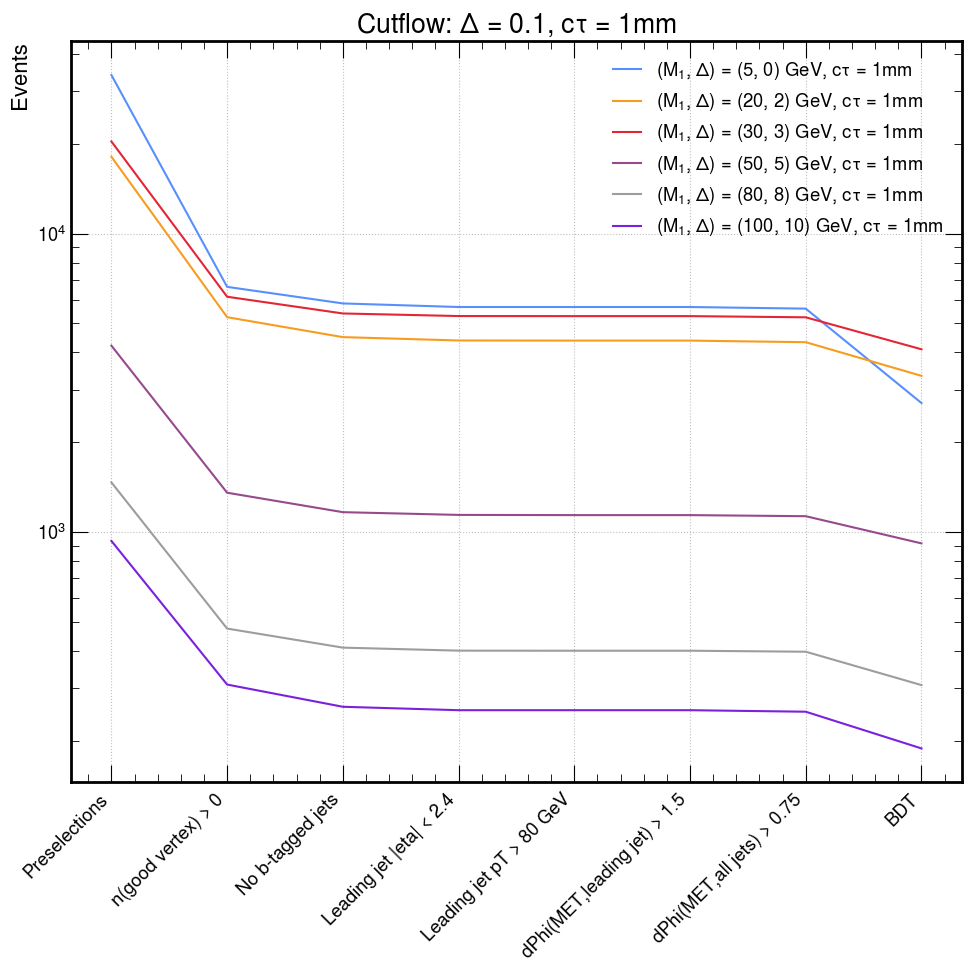

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10.png


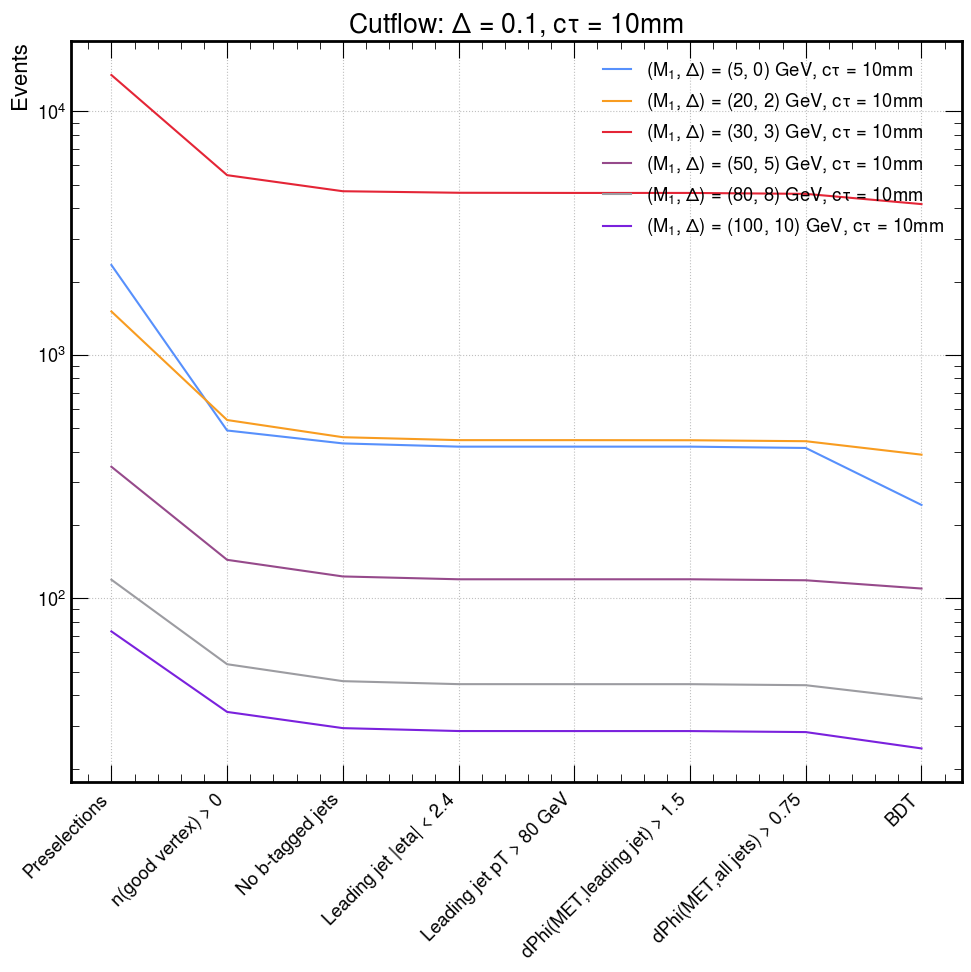

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100.png


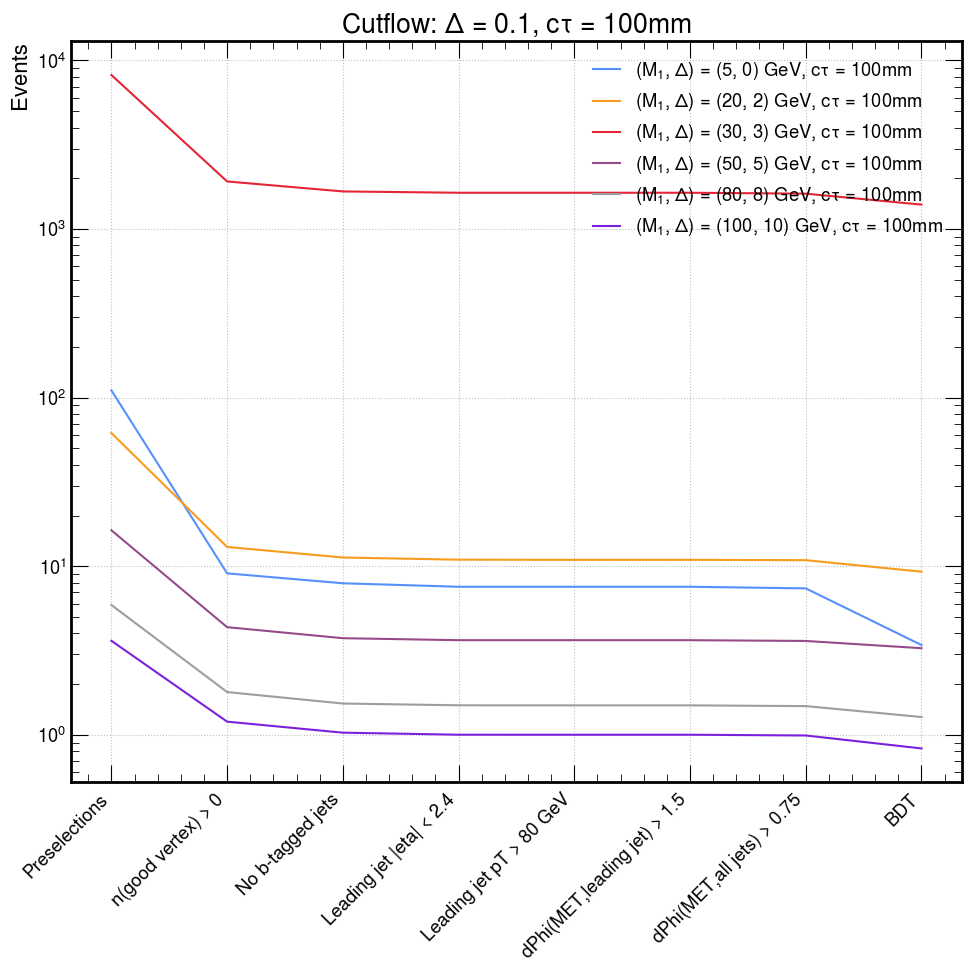

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1.png


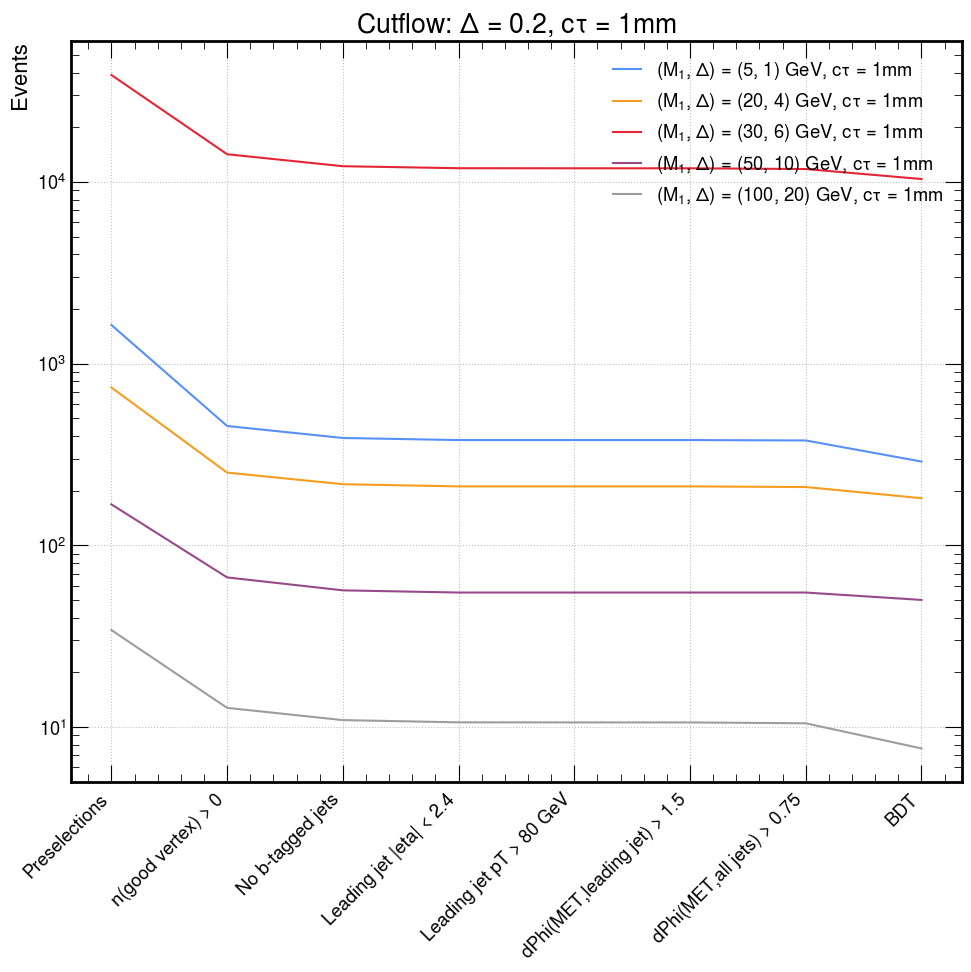

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10.png


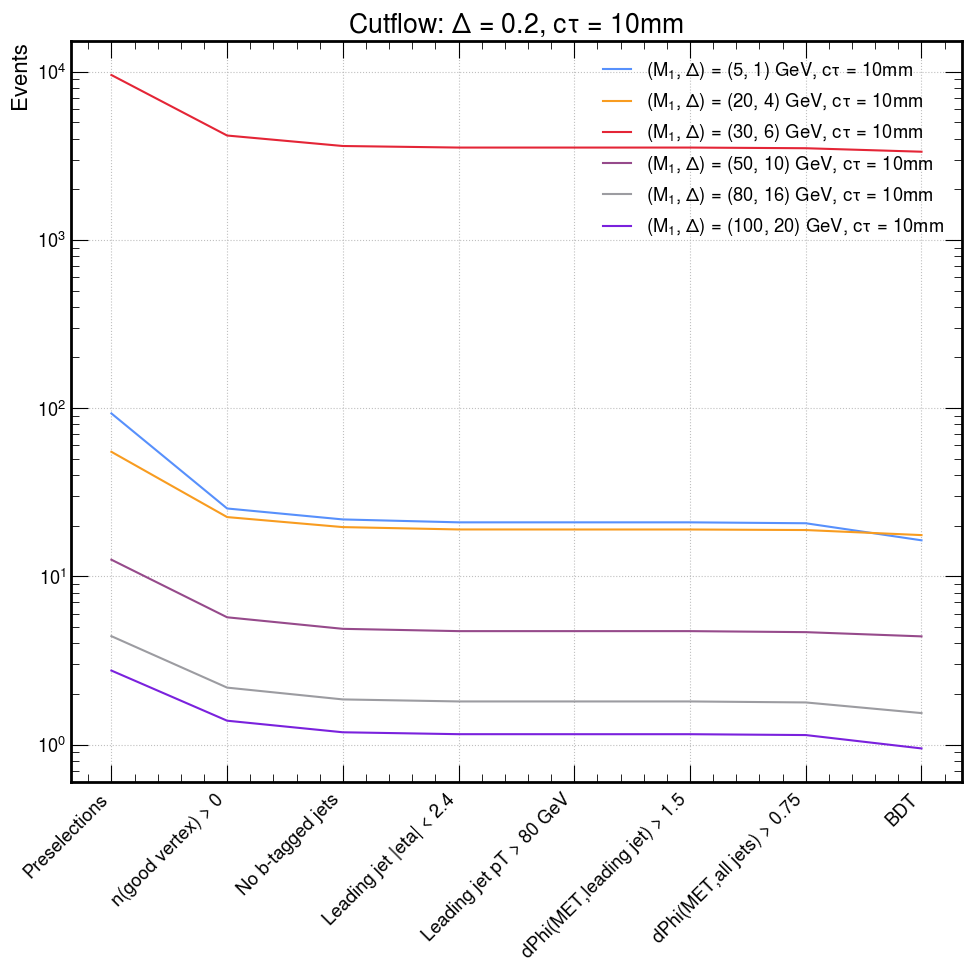

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100.png


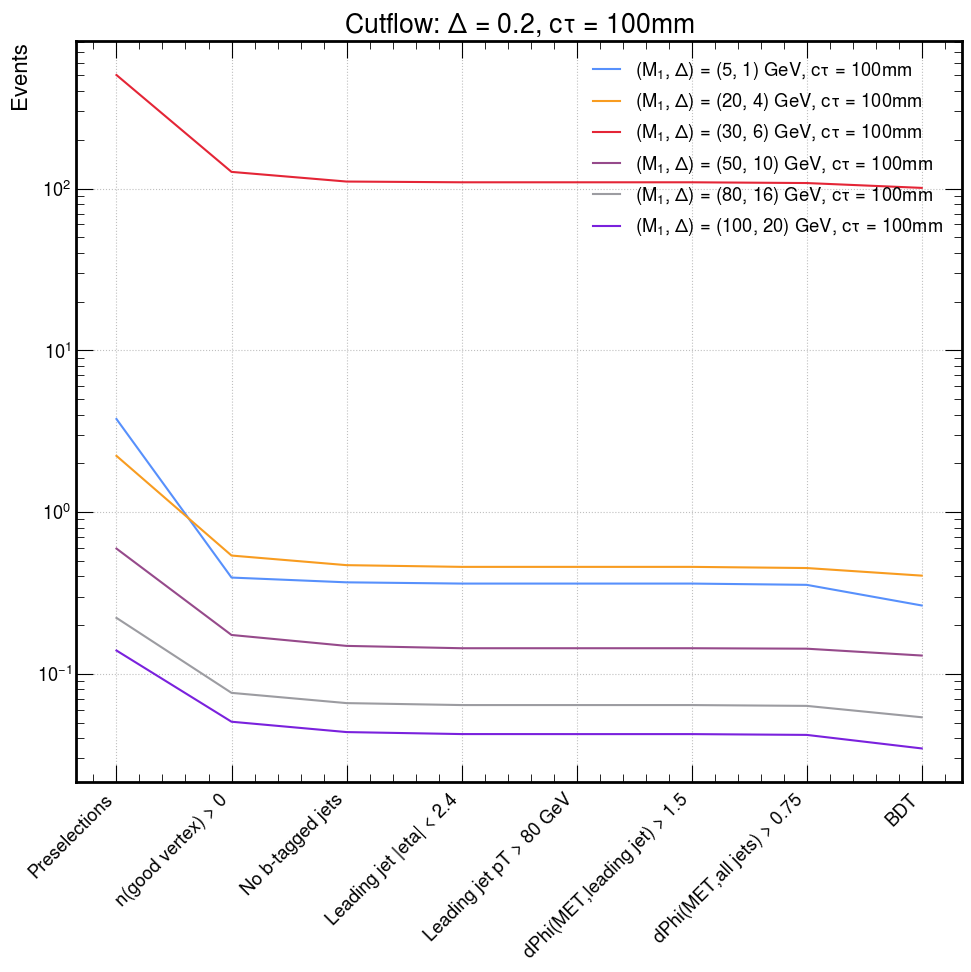

In [42]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 20, 30, 50, 80, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

For background processes, each process (i.e. Top) will have several sub-processes. In the coffea output file, we have efficiencies stored for each sub-processes. In order to get the efficiency of the process, not each sub-process, we have to do some math. In other words, we can't just add up efficiencies.

### Get cutflow information

In [43]:
utils.get_bkg_point_dict(bkg_histo)

,Process
bkg_2018_DY_DYJetsToLL,DY
bkg_2018_ZJets_ZJetsNuNu_HT800to1200,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT400to600,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT2500toInf,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT600to800,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT1200to2500,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT200to400,ZJets
bkg_2018_ZJets_ZJetsNuNu_HT100to200,ZJets
bkg_2018_QCD_QCD_HT500to700,QCD
bkg_2018_QCD_QCD_HT300to500,QCD


In [44]:
utils.get_bkg_point_dict(bkg_histo, selected_process = 'WJets')

,Process
bkg_2018_WJets_WJetsLNu_HT70to100,WJets
bkg_2018_WJets_WJetsLNu_HT800to1200,WJets
bkg_2018_WJets_WJetsLNu_HT400to600,WJets
bkg_2018_WJets_WJetsLNu_HT600to800,WJets
bkg_2018_WJets_WJetsLNu_HT200to400,WJets
bkg_2018_WJets_WJetsLNu_HT2500toInf,WJets
bkg_2018_WJets_WJetsLNu_HT100to200,WJets
bkg_2018_WJets_WJetsLNu_HT1200to2500,WJets


In [45]:
utils.get_bkg_list_of_cuts(bkg_histo)

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [46]:
utils.get_bkg_list_of_cuts(bkg_histo, get_cut_idx = True)

['all', 'hasVtx', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10']

### Display the efficiency and event count table in Pandas Dataframe

In [47]:
# efficiency
bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
DY,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ZJets,0.0023,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
QCD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
WJets,0.0010,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Multiboson,0.0006,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Top,0.0004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Total,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [48]:
# Save as csv
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/Efficiency//SR_Background_Efficiency.csv


In [49]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
DY,"3,986.52",50.68,37.16,33.78,33.78,33.78,33.78,6.76
ZJets,"49,771.90",566.48,427.82,406.99,404.23,403.17,356.72,5.51
QCD,"46,635.03",312.80,83.77,83.77,83.77,77.77,0.00,0.00
WJets,"170,013.29","1,110.70",780.14,749.00,746.54,743.21,616.66,11.44
Multiboson,"4,489.25",32.90,19.44,17.56,16.85,16.56,14.49,0.21
Top,"16,299.76",169.89,94.42,88.77,85.62,85.57,59.29,4.10
Total,"291,195.76","2,243.45","1,442.76","1,379.87","1,370.79","1,360.06","1,080.94",28.02


In [50]:
# Save to csv
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'SR_Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Weighted//SR_Background_EventCount_Weighted.csv


In [51]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
DY,1180,15,11,10,10,10,10,2
ZJets,709875,6240,4202,4058,4043,4004,2988,46
QCD,30250,120,32,32,32,28,0,0
WJets,1103268,5005,2877,2792,2785,2734,1903,37
Multiboson,24268,174,103,94,91,90,77,1
Top,49158,530,306,242,238,236,194,18
Total,1917999,12084,7531,7228,7199,7102,5172,104


In [52]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'SR_Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Raw//SR_Background_EventCount_Raw.csv


In [53]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 28.02


In [54]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['BDT']).transpose(), pd.DataFrame(bkg_cts_raw_df['BDT']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,DY,ZJets,QCD,WJets,Multiboson,Top,Total
Weighted Counts,6.76,5.51,0.00,11.44,0.21,4.10,28.02
Raw Counts,2.00,46.00,0.00,37.00,1.00,18.00,104.00


### Plot the efficiency

Saved: ./plots/cutflow//Cutflow_SR_background.png


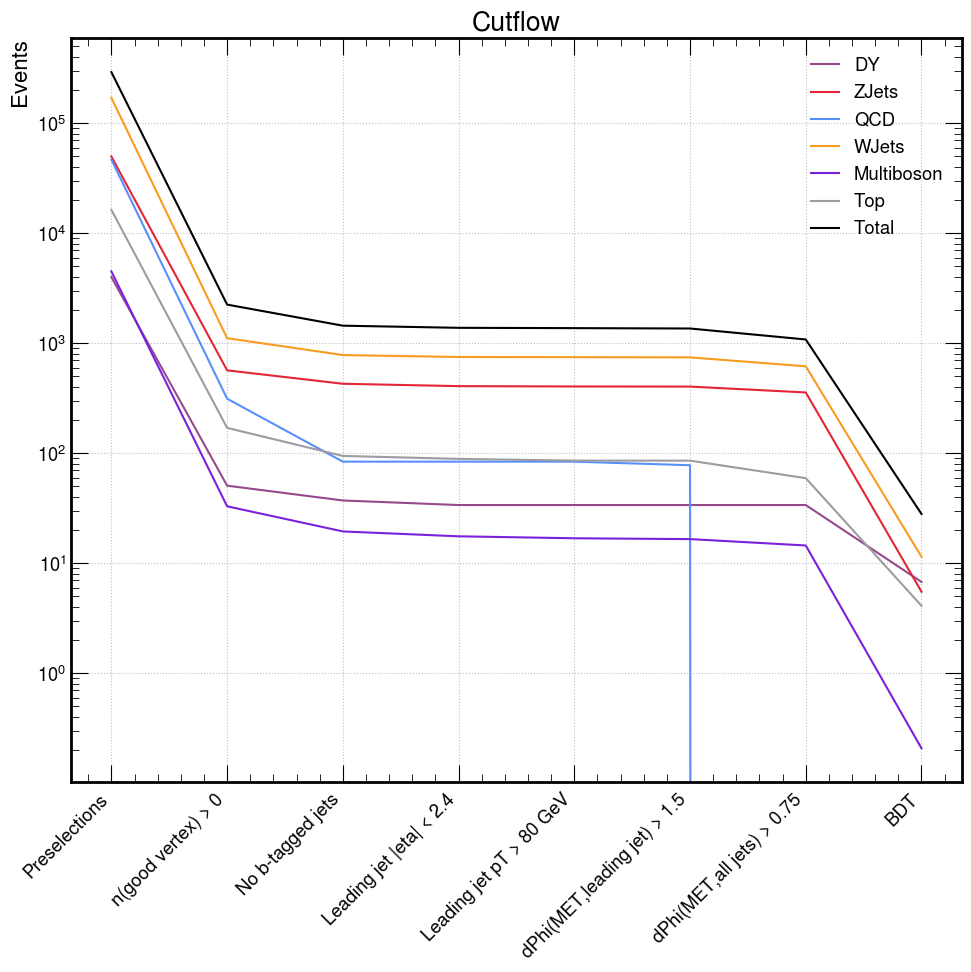

In [55]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': 'Cutflow_SR_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/sqrt(B)

In [56]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

28.01857660572128

In [57]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [58]:
pd.options.display.float_format = '{:,.4f}'.format

In [59]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,BDT,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,3.4100,5.0000,0.1000,100.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"2,704.6748",5.0000,0.1000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,241.8907,5.0000,0.1000,10.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,289.4446,5.0000,0.2000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,16.3704,5.0000,0.2000,10.0000
...,...,...,...,...
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,24.1872,100.0000,0.1000,10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.0346,100.0000,0.2000,100.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.8310,100.0000,0.1000,100.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,7.6392,100.0000,0.2000,1.0000


In [60]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [61]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,3.4100,28.0186,0.6442
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"2,704.6748",28.0186,510.9660
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,241.8907,28.0186,45.6979
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,289.4446,28.0186,54.6817
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,16.3704,28.0186,3.0927
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,100.0000,0.2000,100.0000,0.0346,28.0186,0.0065
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,0.8310,28.0186,0.1570
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,7.6392,28.0186,1.4432
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,100.0000,0.1000,1.0000,188.2531,28.0186,35.5647


In [62]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_S_over_B.csv


### ctau = 1mm

In [63]:
ct = 1.0

In [64]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"2,704.6748",28.0186,510.9660
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"3,463.5493",28.0186,654.3323
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"3,336.5006",28.0186,630.3303
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"4,095.2848",28.0186,773.6795
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"2,127.8975",28.0186,402.0015
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,915.9644,28.0186,173.0436
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,584.1713,28.0186,110.3614
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,417.8413,28.0186,78.9384
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,306.8988,28.0186,57.9792
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,250.9188,28.0186,47.4035


In [65]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,289.4446,28.0186,54.6817
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,209.4889,28.0186,39.5766
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,181.9994,28.0186,34.3832
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"10,381.4362",28.0186,"1,961.2565"
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,110.4670,28.0186,20.8694
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,50.1482,28.0186,9.4740
62,60.0,0.2,1.0,0.0000,28.0186,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,18.8158,28.0186,3.5547
65,80.0,0.2,1.0,0.0000,28.0186,0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,10.3255,28.0186,1.9507


### ctau = 10mm

In [66]:
ct = 10.0

In [67]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,241.8907,28.0186,45.6979
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,314.5663,28.0186,59.4277
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,389.1598,28.0186,73.5199
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"4,161.1685",28.0186,786.1262
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,268.2179,28.0186,50.6716
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,109.7287,28.0186,20.7299
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,70.6007,28.0186,13.3379
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,52.9851,28.0186,10.0099
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,38.7136,28.0186,7.3137
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,30.9041,28.0186,5.8384


In [68]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,16.3704,28.0186,3.0927
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,15.3766,28.0186,2.9049
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,17.5791,28.0186,3.3210
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"3,344.8230",28.0186,631.9026
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,10.9320,28.0186,2.0653
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,4.3951,28.0186,0.8303
63,60.0,0.2,10.0,0.0000,28.0186,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,2.0685,28.0186,0.3908
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,1.5377,28.0186,0.2905
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,1.2223,28.0186,0.2309


### ctau = 100mm

In [69]:
ct = 100.0

In [70]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,3.4100,28.0186,0.6442
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,5.7049,28.0186,1.0778
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,9.2863,28.0186,1.7544
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"1,395.8022",28.0186,263.6944
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,7.1114,28.0186,1.3435
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,3.2657,28.0186,0.6170
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,2.2106,28.0186,0.4176
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,1.5370,28.0186,0.2904
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,1.2763,28.0186,0.2411
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,1.0224,28.0186,0.1932


In [71]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.2645,28.0186,0.0500
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.2897,28.0186,0.0547
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.4045,28.0186,0.0764
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,100.9174,28.0186,19.0653
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.3060,28.0186,0.0578
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.1297,28.0186,0.0245
64,60.0,0.2,100.0,0.0000,28.0186,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0630,28.0186,0.0119
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0539,28.0186,0.0102
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0401,28.0186,0.0076
